For Linear regression generally we used Root Mean Square Error(RMSE) as objective function to minimize error.
<b> RMSD represents the sample standard deviation of the differences between predicted values and observed values</b>

RMSE is senstive to outliers so you can use other functions as well. such as MAE(Mean abosulte error)
All of this are Norms
1. RMSE is euclidean norm
2. MAE is manhattan norm
3. There are other norms as well like L1, L2 norm

These norms are various ways of measuring distance between vectors
<b>Higher the norm index, the more it focuses on large values and neglect small ones. THis is why RMSE is more senstitive to outliers that the MAE. when outliers are exponenetially rare RMSE also performs very well

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
def load_housing_data():
    data_path = './housing/housing.csv'
    return pd.read_csv(data_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# if you carefully observe total_bedrooms has only 20433 non-null which means (20640 - 20433) districts has missing total_bedrooms values

In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


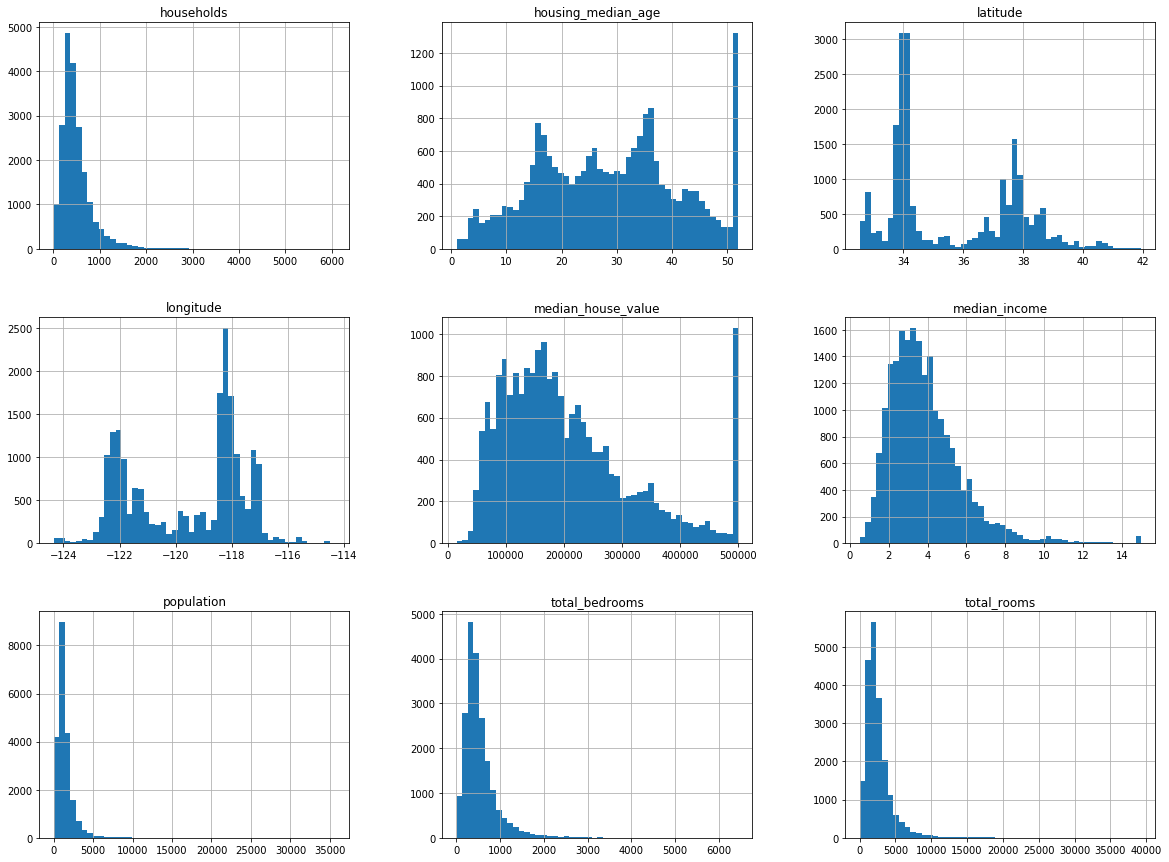

In [13]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
'''
This will divide the data into two sets one is training_set and test_set
This will split data randomly
'''
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [31]:
'''
 Now we will learn new kind of sampling, which is stratified sampling
 If you random sampling, there is a chance you might be getting baised data of test_set, so you cannot validate your model properly
 In stratified sampling it will make sure, data is baised
'''
'''
adding a new column income_cat to use in stratified sampling
'''
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5,5.0,inplace=True)

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    print(test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
'''
Looks like this loop will iterate, n_splits times
'''

[ 5241 10970 20351 ...  4019 12107  2398]


'\nLooks like this loop will iterate, n_splits times\n'

In [33]:
'''
  Now just drop the column income_cat which we created
'''
strat_test_set.drop(['income_cat'], axis = 1, inplace=True)
strat_train_set.drop(['income_cat'], axis = 1, inplace=True)

In [34]:
housing = strat_train_set.copy()

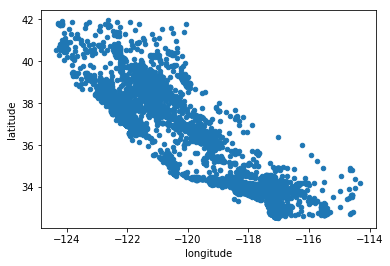

In [35]:
housing.plot(kind='scatter', x="longitude", y="latitude")

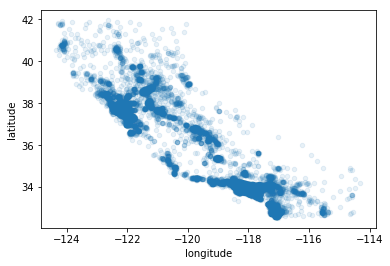

In [36]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1)

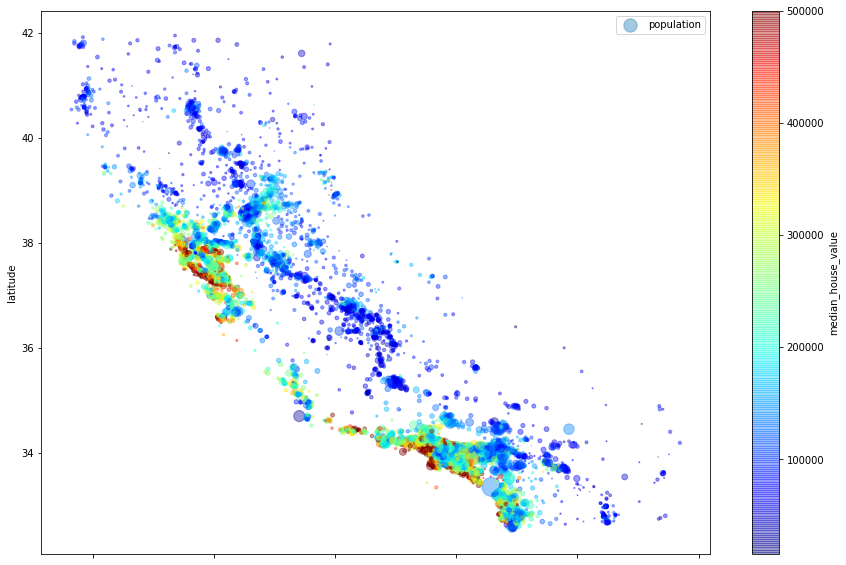

In [39]:
housing.plot(kind='scatter', x = "longitude", y = "latitude", alpha=0.4, s=housing['population']/100, label="population", c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(15,10))
plt.legend()

In [40]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

C:\Users\vikra\AppData\Local\Continuum\anaconda3\envs\vikramthesis\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD0B458160>,
      dtype=object)

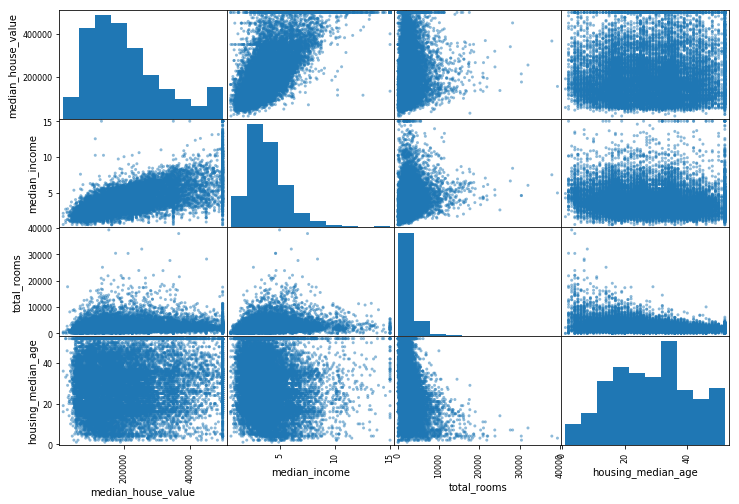

In [41]:
from pandas.tools.plotting import scatter_matrix
attributs = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributs], figsize=(12,8))

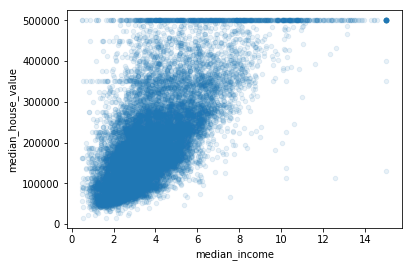

In [44]:
housing.plot(kind='scatter', x="median_income", y="median_house_value", alpha="0.1")

In [45]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

In [46]:
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']

In [47]:
housing['population_per_household'] = housing['population'] / housing['households']

In [48]:
corr_matrix = housing.corr()

In [49]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [50]:
x='''
The new_bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms
'''

<h3> Prepare the Data for Machine Learning Algorithms </h3>

In [52]:
housing = strat_train_set.drop(["median_house_value"], axis = 1)
housing_labels = strat_train_set["median_house_value"]

<h3>Data Cleaning..</h3>

In data cleaning, one interesting thing is how to handle missing values
Three options for handling missing_values
1. Remove instances(records) which has missing value
2. Remove the whole attribute
3. Set the values to some value(zero, mean, median. etc..)

In [57]:
#housing.dropna(subset=["total_bedrooms"]) #option1
#housing.drop(["total_bedrooms"], axis=1)  #option2
#median = housing['total_bedrooms'].median() #option3
#housing['total_bedrooms'].fillna(median)

In [58]:
'''
 Sklearn handy class to take care of missing values: Imputer
'''
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

In [59]:
imputer.fit(housing)

ValueError: could not convert string to float: 'NEAR BAY'

In [60]:
# It will expect all columns to float

In [63]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [64]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [66]:
# _is internal variable, it is median of all columns
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [67]:
X = imputer.transform(housing_num)

In [69]:
'''
  As X is a numpy array containing transformed features. if you want to back in to Pandas DataFrame
'''
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

<h5>Design principles of SciKitLearn</h5> 
<b>https://arxiv.org/pdf/1309.0238v1.pdf</b>

<h3> Handling Text and Categorical Attributes </h3>

Machine Learning doesn't like Text values it only likes the numbers, We have a column which 'ocean_proximity' attribute, so we need to convert it to integers

In [75]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()
housing_cat_encoded = lb_encoder.fit_transform(housing['ocean_proximity'])

In [76]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [77]:
lb_encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

But there is issue if encode text as numbers, because it label encoder gave each class with a certain value, but in most of machine learning algorithms if two numbers are close there are similar.
But if you see <1H OCEAN has 0 and INLAND has 1 which are not as similar as <1H OCEAN and NEAR OCEAN, which has values like 0, 4

In [82]:
# for the above reason we will use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
oh_encoder  = OneHotEncoder()
housing_cat_1hot = oh_encoder.fit_transform(housing_cat_encoded[:,np.newaxis])

In [83]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [85]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [86]:
# In above we used two things  LabelEncoder and oneHotEncoder, instead of using one by one, you can below one
from sklearn.preprocessing import LabelBinarizer
lb_encoder = LabelBinarizer()
housing_cat_1hat = lb_encoder.fit_transform(housing['ocean_proximity'])

In [87]:
housing_cat_1hat

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

<h3>Custom Transformers </h3>

In [105]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:, population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

<h3>Feature Scaling</h3>

If two data column values are at different scales, then it might be a problem in machine learning
So, it is good practice to do scaling
<h5>1. Min Max Scaling(MinMaxScaler)</h5>
In Min max scaling you will subtract min and will divide (Max-Min). So that all values in 0 to 1
<h5>2. Standardization(StandardScaler)</h5>
It will remove mean, at will make zero mean data, and it will divide by variance so that it will have unit variance.
After standarization data will be zero mean, and unit variance.
Standardization is good for when there are outliers, but values might not be in 0-1

<h3>Transformation Pipleline</h3>

In [166]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, num_attributes):
        self.num_attributes = num_attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.num_attributes].values

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion


In [169]:
num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

In [170]:
num_attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [177]:
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y= None):
        return self
    
    def transform(self, X, y = None):
        print("vikram...")
        print(X.shape)
        lbl_binarizer = LabelBinarizer()
        return lbl_binarizer.fit_transform(X)

In [178]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

In [186]:
cat_pipline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('label_binarizer', CustomLabelBinarizer())
])

In [187]:
full_pipeline = FeatureUnion([
    ('num_pipleline', num_pipeline),
    ('cat_pipeline', cat_pipline),
])

In [190]:
housing_prepared = full_pipeline.fit_transform(housing)


vikram...
(16512, 1)


(16512, 1)